# DATA 550 Lab 4 - Storytelling and visualizing trends and uncertainties

## Name: Connor Fairbanks

## Date: Feb 11, 2021

There are two versions of this lab, one in Python and one in R.
The R lab will use `ggplot` and the Python lab will use `Altair`.

This is the R version.

Each partner should choose a version to complete, though keep in mind that **you are required to alternate between completing the R labs and the Python labs** to get experience using both languages.

## Acknowledgemnts

This lab was lightly adapted from the one created by Joel Ostblom for the DSCI 531 version of Data Viz I in the 2020/21 Academic year.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li>Each partner should complete one file, though collaboration is permitted.</li>
  <li>Push your <code>.ipynb</code> files to GitHub frequently (i.e. not just in one fell swoop at the end).</li>
  <li>Don't forget to submit a clickable link to your GitHub repo on Canvas so we can grade it.</li>
</ul>
</div>

# 0. The back story

*(If you don't like the back stories, you can jump down to the heading "The data" Also a disclaimer that I am not a linguist, so this lab is my understanding of some articles I have read, it is likely not perfect.)*

First, I just want to thank you for bringing me back to my senses and stopping my world domination attempt and silly startup idea. I don't know what happen, but I clearly wasn't myself there for a while. Now that you have brought me back to normal, I would like design this lab more similar to the first one and go through a topic that I find intriguing and ponder-worthy.

This time, instead of looking around us, we will look inside. Ever since I arrived on this planet, I have been fascinated about your use of airborn oscillations to transmit information generated by electrical impulses. And the fact that you rely on muscular dexterity for the encoding process as well as passive mechnotransduction for the decoding is truly remarkable (in a primitive sense of course, I guess how your kind can appreciate "the remarkable complexity" of a cave painting). Such a system is clearly a bottleneck in terms of information bandwidth and I am surprised a more direct means of intercranial transmission never evolved here, but from the perspective of my research on less evolved galactic lifeforms I find this fascinating!

After hearing that there are over 7,000 languages spoken across this globe, I am curious whether some of these at least allow for more rapid information transmission than others. The implications of this reach beyond just communication as I have recently learned that you also restrict many of your thoughts to those that can be expressed in words (again, fascinating!). This means that you could literally upgrade your thought throughput by learning a new language. And it could mean that there are groups of people who have access to faster thinking others, just because their language can convey information at a higher rate, what an enormous advantage!

## The data

To aid our exploration of whether some languages are more efficient at conveying information than others, I have received assistance from some of your finest scientists. The data in this lab was published as part of a study in Science Advances in 2019 and made publicly available in their online repository. If you want to read part of the article, I recommend that you do it after attempting to answer the questions (or if you get stuck) since it will give away some of the things that we can otherwise "discover" ourselves. There is also a popular science version of this article publish in The Economist, and I link to both in the optional question at the end.

The scientists have compiled two tables, one with general information on the languages we are studying and one with experimental data where they recorded people speaking a certain text in different languages and noted down how fast they spoke, etc. You can find a description of the columns of both datasets below and they are available in your lab repo.

---

<center><h3>Languages dataset</h4></center>

| Column              | Description                                       |
|---------------------|---------------------------------------------------|
| iso_lang            | ISO_639-3 language code                           |
| language            | Language name                                     |
| information density | Bits of information per syllable in the language  |
| distinct_syllables  | The number of different syllables in the language |
| continent           | The continent where the language is spoken        |

---

<center><h3>Spoken texts dataset</h4></center>

| Column    | Description                                     |
|-----------|-------------------------------------------------|
| speaker   | Speaker ID                                      |
| iso_lang  | ISO_639-3 language code                         |
| text      | Text ID                                         |
| sex       | The sex of the speaker                          |
| duration  | The number of seconds it took to speak the text |
| syllables | Number of syllables uttered during the speech   |
| age       | The age of the speaker                          |

---

Overall, you will have a bit less direction in this lab to closer simulate a real-life scenario. The questions are a mix of explicit instructions and describing the problem in text, rather than in exact steps. As part of this, there is also a few data wrangling steps needed. As this is an exercise in you interpreting information, it is up to you to clarify what you don't understand with me and the TAs during labs and office hours, just as you would in a real-life collaboration.

# 1. Language exploration

<p>Let’s first get familiar with potential differences and similarities between the languages in this data set. Clearly a language's information density is going to be important in how quick a speaker can convey information, but I wonder if number of distinct syllabus matter. Let's see if we can see any patterns by organizing the languages by these two variables.</p>

<div class="alert alert-success" style="color:black">

### Question 1
rubric={accuracy:1,visualization:1}

<h4>R</h4>
<ol type="1">
<li>Create a scatterplot of the information density of each language versus its number of distinct syllabus.</li>
<li>You will notice that the data appears to cluster in groups in the scatter plot. Can you find a categorical variable in this dataframe that roughly explains this clustering? Color the points in the plot you just created according that variable and add a suitable trend line for each cluster (optionally including a confidence interval for the fitted line). If there are any points that seem to be outliers, avoid overfitting the trendline to them.</li>
<li>If you think any particular data points deviate from their cluster, label them with their language name in the plot.</li>
</ol>

</div>

In [1]:
library(ggplot2)
library(tidyverse)


# Set global theme
my_theme <- theme_bw() +
  theme(
    text = element_text(size = 12),
    panel.border = element_rect(colour = 'grey80'), 
    panel.grid.minor = element_blank(), 
    axis.title.x = element_text(margin = margin(t=10)),
    axis.title.y = element_text(margin = margin(r=10))
  )
theme_set(my_theme)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

<U+221A> tibble  3.0.3     <U+221A> dplyr   1.0.2
<U+221A> tidyr   1.1.2     <U+221A> stringr 1.4.0
<U+221A> readr   1.3.1     <U+221A> forcats 0.5.0
<U+221A> purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'ggrepel' was built under R version 4.0.3"


[1] 17

`geom_smooth()` using formula 'y ~ x'



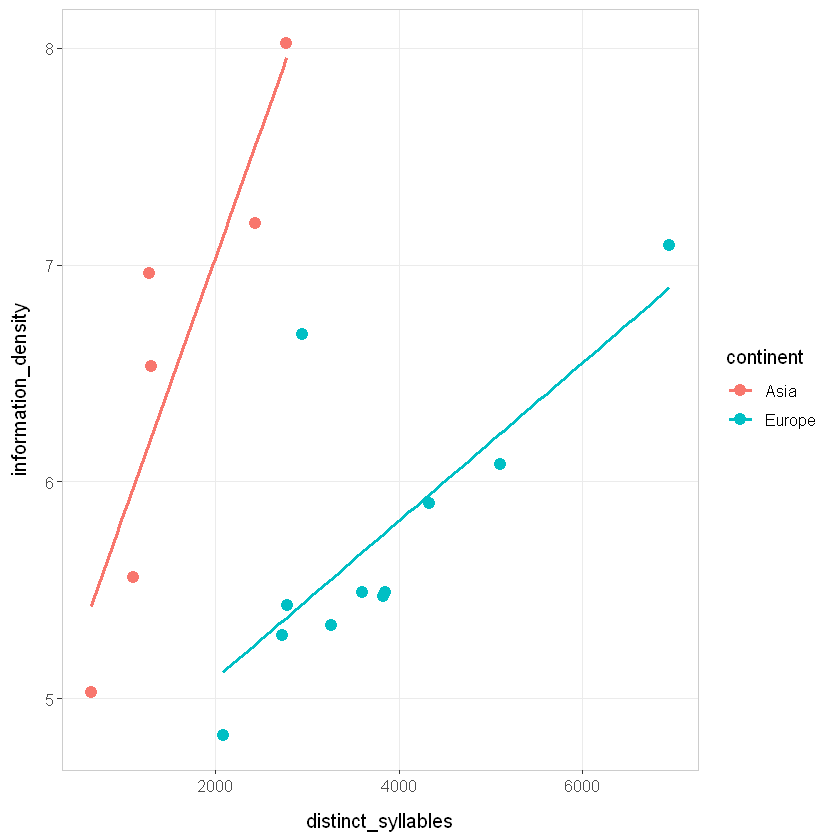

In [2]:
# YOUR ANSWER GOES HERE
# This first plot is just to explore the data and determine if there are any visual outliers.
# It does not have proper titles for that reason. 
q1_data <- read.csv("languages.csv")
nrow(q1_data)
q1_plot <- ggplot(q1_data) + aes(x= distinct_syllables, y= information_density, color= continent) + geom_point(size=3) +
geom_smooth(se = FALSE, size = 1, method = 'lm')
q1_plot

We can see from the plot above that there is one major outlier that we want to exclude from the trendline calculation. It is the `Europe` point at roughly 3000 `distinct_syllables` and 6.6 `information_density`. This point is affecting the `Europe` trendline. We will now determine which language that outlier point is. We can see from the cell below that the language is `French`.

In [3]:
q1_data %>% filter(distinct_syllables < 3000, information_density > 6.5, continent == 'Europe')

iso_lang,language,information_density,distinct_syllables,continent
<chr>,<chr>,<dbl>,<int>,<chr>
FRA,French,6.68,2949,Europe


In [4]:
# Remove the French row and place it in its own dataframe
french <- q1_data %>% filter(distinct_syllables < 3000, information_density > 6.5, continent == 'Europe')
# Create dataframe without French row in it: 
q1_data_clean <- q1_data %>% filter(language != 'French')


In [5]:
# Create new columns with the row to be highlighted as the only TRUE value. 
q1_data$highlight <- FALSE
q1_data$highlight[q1_data$language == 'French'] <- TRUE

`geom_smooth()` using formula 'y ~ x'



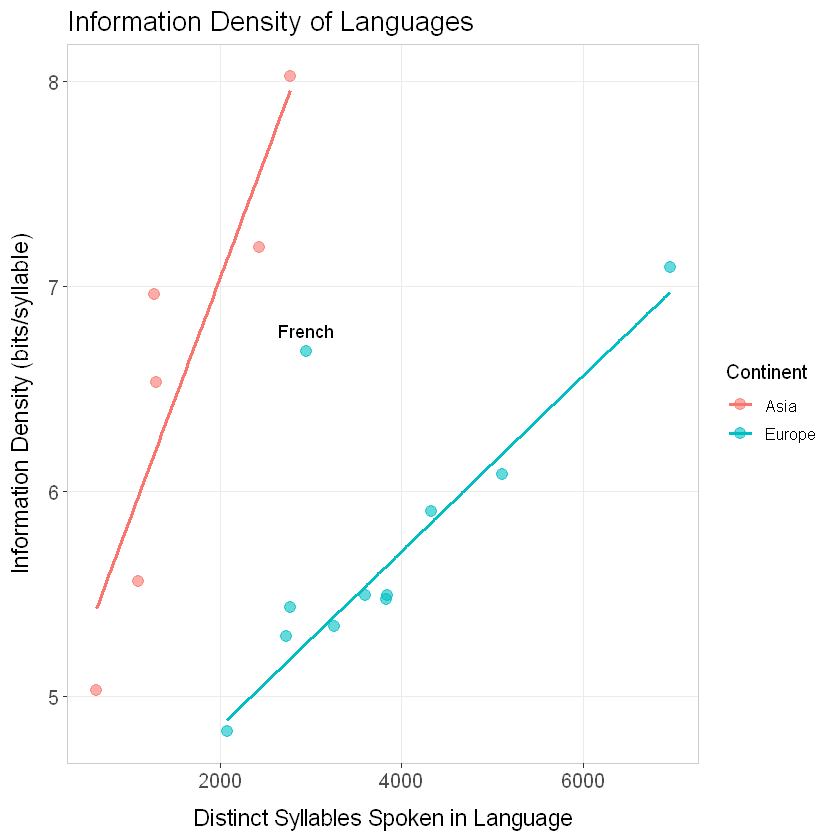

In [6]:
# Create and Display Plot. 
q1_plot <- ggplot(q1_data) + aes(x= distinct_syllables, y= information_density, color= continent) + geom_point(size=3, alpha=0.6) +
# Ignore outlier French point when making the trendlines. 
geom_smooth(data=q1_data_clean, se = FALSE, size = 1, method = 'lm') + 
geom_text(data=french, label="French", vjust=-1, show.legend=FALSE, color='black')+
labs(x= "Distinct Syllables Spoken in Language", y="Information Density (bits/syllable)", title= "Information Density of Languages", color= "Continent") +
    theme(plot.title= element_text(size=16), axis.title= element_text(size=14), axis.text= element_text(size=12))
q1_plot


We can see from the final plot above that the angle and location of the trendline for the `Europe` languange does in fact change when we omit the outlier `French` language point from the trendline calculation. 

# 2. Speech rate and information density

Hmm... what an intriguing relationship we just revealed... let’s keep these clusters in mind while exploring whether continuing our exploration. The two variables that directly determine the information rate of a language are its information density (bits of information per syllable) and the rate at which it is spoken (syllables per second). A high value in both would indicate a high information rate and efficient communication (a higher number of information bits conveyed per second).

<div class="alert alert-success" style="color:black">

### Question 2
rubric={reasoning:2,accuracy:3}
    
<h4>R</h4>
<ol type="1">
<li>While the information density of each language have already been provided to us, we will have to approximate the speech rate (syllables per second) of each language via the <code>spoken_texts</code> dataset. Using this data, calculate the average speech rate per language (for now, treat all entries as individual observations, even if some are read by the same person).</li>
    <li>Create a new column, <code>speech_rate</code>, in the <code>languages</code> data frame that hold these average values. Since the calculated values are not in the same order as the languages in the <code>languages</code> data frame, you cannot simply append it. Instead, you need to use the <code>inner_join</code> function to merge the dataframe of average speech rate values that you just created with the <code>languages</code> dataframe. The language ISO codes could be used as the column to join on.
<li>Create a scatter plot of the information density versus the speech rate for the <code>languages</code> dataframe. Use the same groupings as in the previous scatter plot you made and add one trend line per group. Label the same points with text labels as in the previous scatterplot.</li>
<li>Write a few sentences under the plot describing the relationship you observe. Based on this plot, do speakers of any particular languages appear to be more efficient at conveying information?</li>
</ol>
    
</div>

In [7]:
st_df <- read.csv("spoken-texts.csv")
# find speech rate per entry 
st_df$lang_speech_rate <- round(st_df$syllables/st_df$duration, 2)
# group by language and find the average speech rate of each language. 
lang_avg_sr <- aggregate(st_df$lang_speech_rate, list(st_df$iso_lang), mean)
# rename columns to allow merging of dataframes. 
colnames(lang_avg_sr) <- c('iso_lang', 'speech_rate')
# join average speech rates by language to language dataframe. 
q2_df <- inner_join(q1_data, lang_avg_sr, by='iso_lang')
# round speech_rate column for readability
q2_df <- q2_df %>% mutate(speech_rate = round(speech_rate, 2))
head(q2_df)

,iso_lang,language,information_density,distinct_syllables,continent,highlight,speech_rate
,<chr>,<chr>,<dbl>,<int>,<chr>,<lgl>,<dbl>
1,CAT,Catalan,5.49,3600,Europe,FALSE,7.07
2,CMN,Mandarin,6.96,1274,Asia,FALSE,5.86
3,DEU,German,6.08,5100,Europe,FALSE,6.09
4,ENG,English,7.09,6949,Europe,FALSE,6.34
5,EUS,Basque,4.83,2082,Europe,FALSE,7.54
6,FIN,Finnish,5.49,3844,Europe,FALSE,7.17


`geom_smooth()` using formula 'y ~ x'



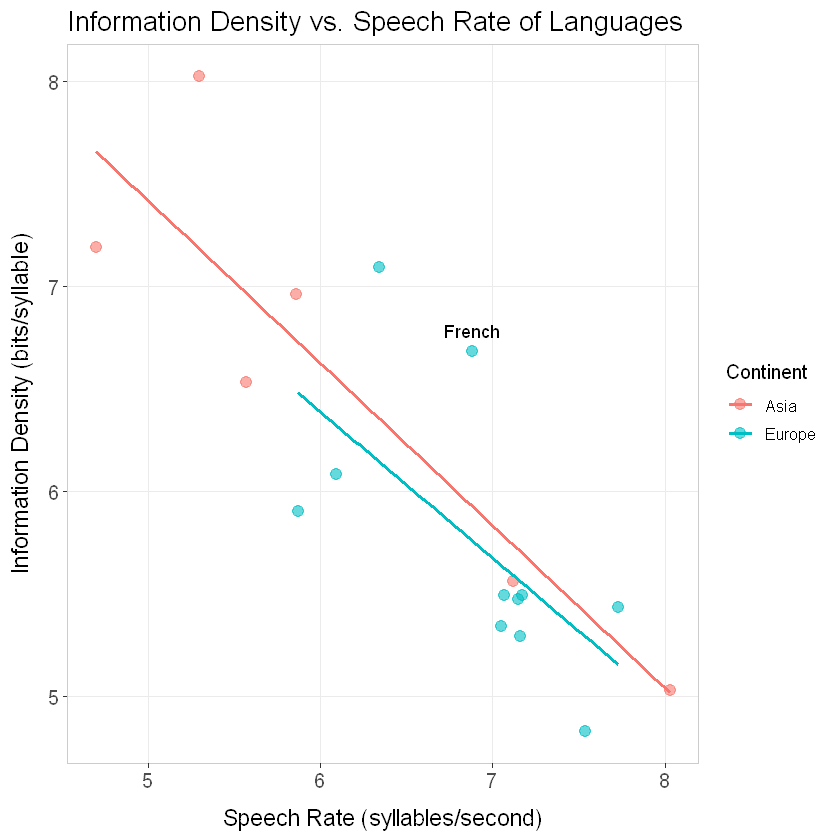

In [8]:
# YOUR ANSWER GOES HERE
# Create French dataframe for labelling of the french point on the plot
french <- q2_df %>% filter(language == 'French')
# Create and Display Plot. 
q2_plot <- ggplot(q2_df) + aes(x= speech_rate, y= information_density, color= continent) + geom_point(size=3, alpha=0.6) + 
geom_smooth(se = FALSE, size = 1, method = 'lm') + 
geom_text(data=french, label="French", vjust=-1, show.legend=FALSE, color='black')+
labs(x= "Speech Rate (syllables/second)", y="Information Density (bits/syllable)", title= "Information Density vs. Speech Rate of Languages", color= "Continent") +
    theme(plot.title= element_text(size=16), axis.title= element_text(size=14), axis.text= element_text(size=12))
q2_plot

YOUR ANSWER TO 4 GOES HERE

A minor observation noticed is that the variance in the speech rate and information density appears to be larger for languages from Asia when compared to languages from Europe. 

The main relationship we observe in this plot is that in general, as the speech rate of a language increases, the information density of that language decreases. This trend is present for languages regardless of the continent where that language is spoken as seen by the roughly parallel trend lines. This would lead us to believe that as a language speech rate increases, it becomes less efficient at conveying information in each individual syllable (they transfer less bits/syllable spoken). The increased speech rate may compensate for this decrease in efficiency to allow for a similar amount of information to be transferred in the same amount of time when compared to languages with higher information density and slower speech rates.  

The languages in the top right-hand corner of this plot would be the most efficient at conveying information. Of the languages compared in this plot, the French language appears to be more efficient than other languages at conveying information, although I would not say that it is highly efficient (it is still near the middle of the plot).
 


# 3. Language information rate

Oh those results are very interesting… Hmmm I wonder why it looks like that… Ahhh I see what happened, I forgot to include the severe limitations of the feeble human mind in my hypothesis, oh oops you’re still here, ehh well 🪄*obliviate* to you and let’s carry on.

<div class="alert alert-success" style="color:black">

### Question 3
rubric={accuracy:3,viz:2}
    
<h4>R</h4>
    
<ol type="1">
<li>It looks like we do not have a language that is high both in information density and speech rate, which could indicate that human minds are not good at processing auditory information beyond a certain rate limit (read more in the article if you're interested). Let’s directly plot the rate at which information is conveyed for all the languages to see if there are at least small differences between them. Combine the appropriate columns to create a new column, <code>information_rate</code>, which holds the amount of information per second conveyed by each speaker.</li>
<li>Create a plot that has the language ISO codes on one axis and the information rate on the other. Plot a graphical representation of either the distribution of data or every single data point. Color this by the same variable as in the previous two scatter plots. Sort the languages in a suitable order.</li>
<li>Include a mark for the mean and the 95% confidence interval on top of the mark you just created above. Color this in a suitable way so that it stands out from the distribution/individual observations created in the previous point.</li>
</ol>
</div>

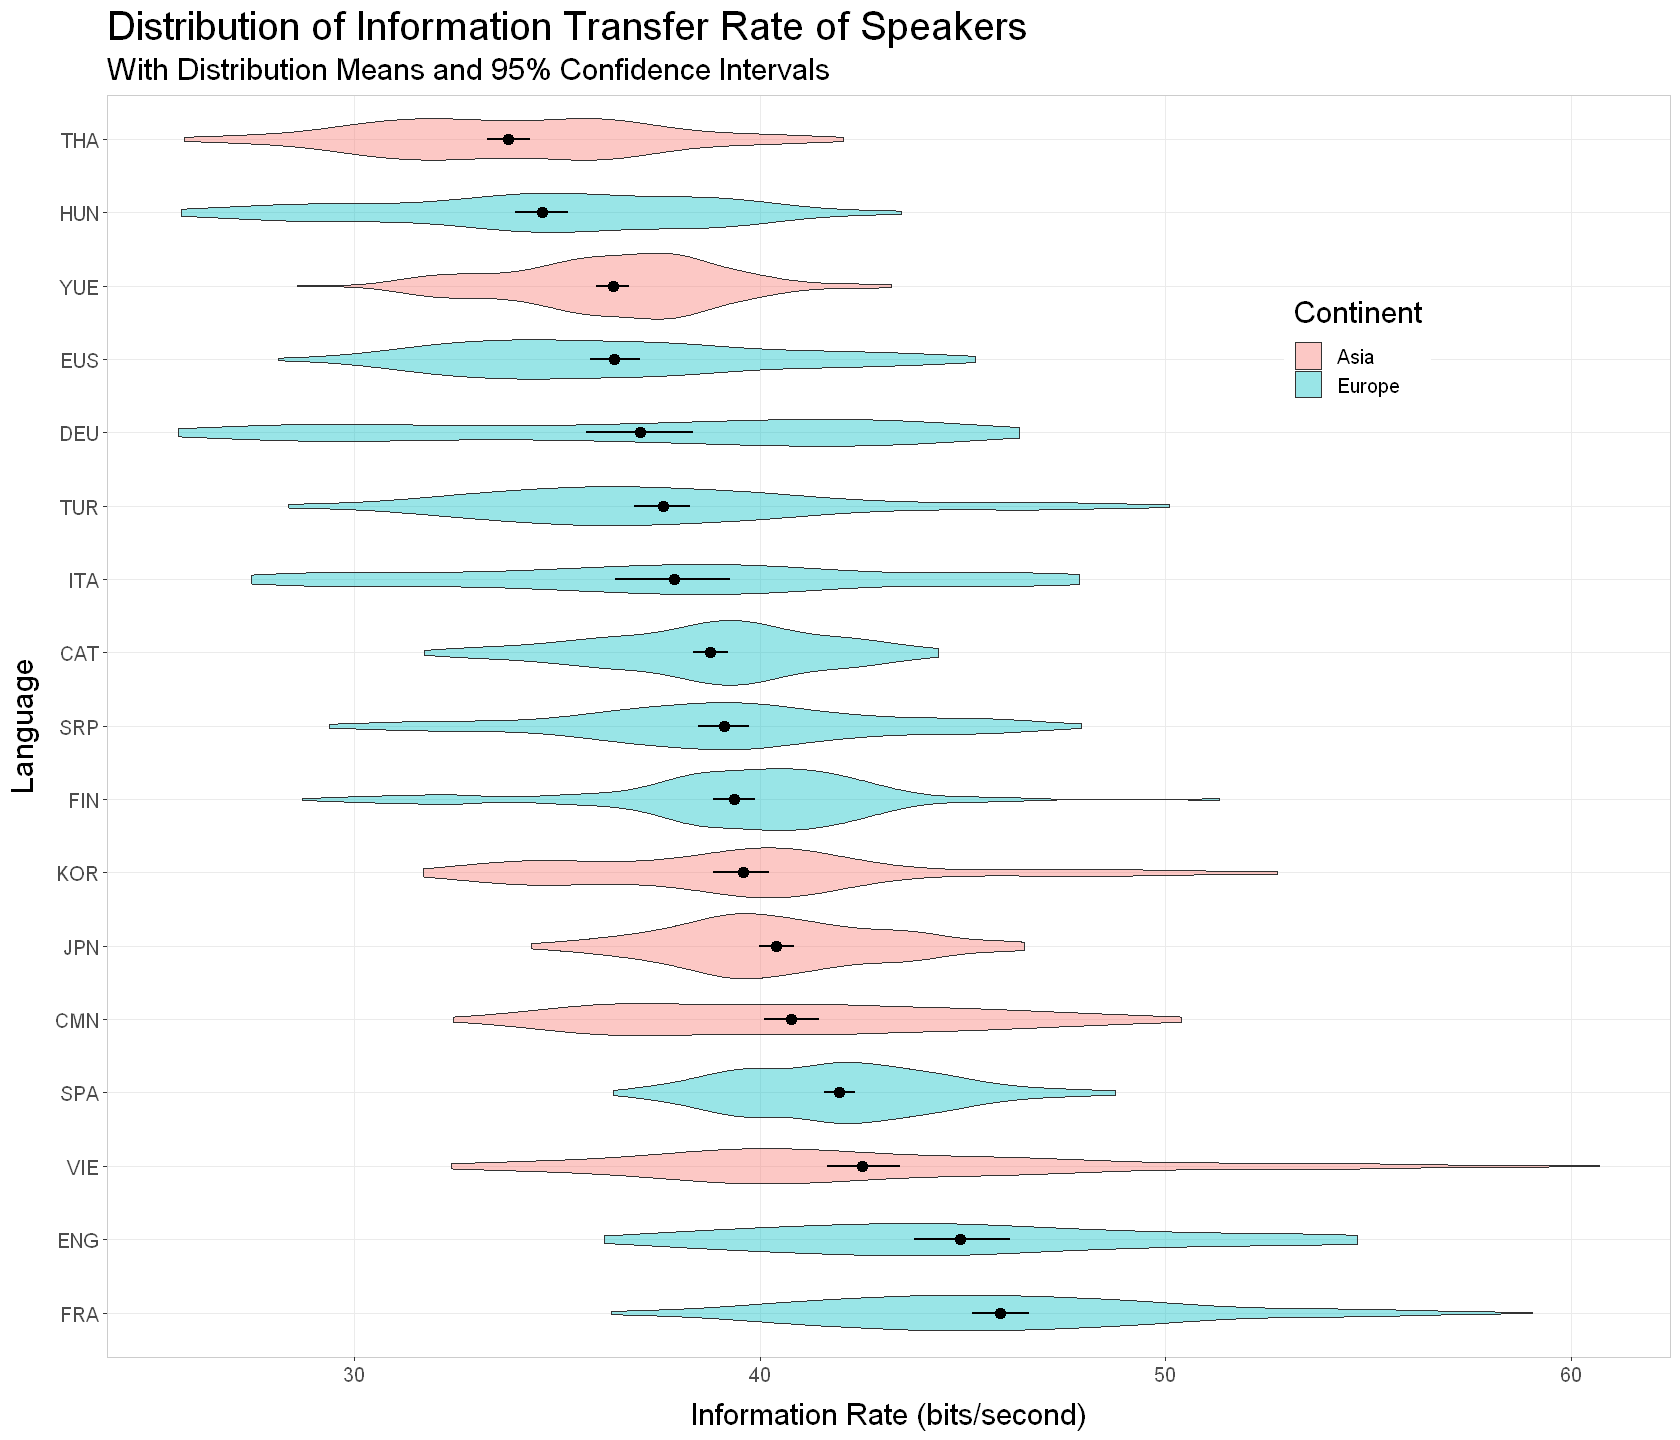

In [9]:
# Adjust size of plot
options(repr.plot.width=14, repr.plot.height=12)
# Create df of only language and information density for merging with spoken texts dataframe
dens_df <- q2_df %>% select(iso_lang, information_density, continent)
# Merge dataframes
q3_df <- inner_join(st_df, dens_df, by='iso_lang')
# Create new column
q3_df$information_rate <- round(q3_df$lang_speech_rate * q3_df$information_density, 2)

q3_plot <- ggplot(q3_df) +
    aes(x = information_rate,
        y = reorder(iso_lang, -information_rate), fill= continent) +
    geom_violin(alpha = 0.4)+
    geom_pointrange(stat = 'summary', fun.data = mean_cl_boot, size = 0.6, show.legend=FALSE)+
    labs(x= "Information Rate (bits/second)", y="Language", title= "Distribution of Information Transfer Rate of Speakers",
         subtitle= "With Distribution Means and 95% Confidence Intervals", fill= "Continent") +
    theme(plot.title= element_text(size=24), axis.title= element_text(size=18), axis.text= element_text(size=12),
          legend.title = element_text(size=18), legend.text=element_text(size=12),
         plot.subtitle= element_text(size=18), legend.position= c(0.8, 0.8))

q3_plot


# 4. Tell a story

<div class="alert alert-info" style="color:black">

### Question 4
rubric={reasoning:3}
    
These results are looking pretty promising, now we just need to add a narrative so that it will be easy for others to follow along with what we have done here. Tell a story using the three plots we have created. Build it up according to the principles and examples from this week's required readings. In your story you can refer to the plots as plot A,B, and C. You story should make it clear what the plot is telling us and how it motivates the next plot we're making so that there is a clear story line for the reader to follow as well as a clear take home message (there might be many messages in these plots, so you can choose which to focus on). No need to write an essay here, a succinct paragraph per plot should do it.

</div>


We are interested in finding out if certain languages convey information more efficiently than others. We started by checking to see if the number of distinct syllables spoken in each language affects the information density of that language. We observed from plot A that as the number of syllables spoken in a language increased, the information density of the language increased as well. We also observed a distinct separation between European and Asian languages, with European languages having more syllables spoken. That was interesting, but not highly informative in terms of the rate of information transfer of each language. To explore our initial question, we decided to compare the information density to average speech rate of each language in plot B. Plot B showed us that in general, as the speech rate of a language increases, the information density of that language decreases. This trend is present for languages regardless of the continent where that language is spoken as seen by the roughly parallel trend lines. This would lead us to believe that as a language speech rate increases, it becomes less efficient at conveying information in each individual syllable (they transfer less bits/syllable spoken). We can see that there aren't any languages in the top right corner of the plot. These would be the languages that have the highest rate of information transfer (they speak fast and have high information density in each syllable). Plot B leads one to wonder if the increased speech rate may compensate for this decrease in efficiency to allow for a similar amount of information to be transferred in the same amount of time when compared to languages with higher information density and slower speech rates. To find out if this truly is that case, we multiplied the speech rate by the information density for each individual speaker to find out their information transfer rate (in bits/second). This tells us how efficient a language is at conveying information. We then plotted the distribution of multiple speakers by language in plot C, sorted from lowest efficiency to highest efficiency. We can see that European and Asian languages are quite evenly dispersed in the rankings, so it does not seem like one continent's languages are on average more efficient at transferring information than the others. We can also conclude from this plot that even though all languages explored here are not drastically different from one another in terms of information transfer rate, the language that is the most efficient at transferring information is French.

# 5. Figure composition

<p>Now that we have the individual figures and the story, the final step for us here is to compile our figures into the same layout for presentation.</p>

<div class="alert alert-success" style="color:black">

### Question 5
rubric={accuracy:1,viz:2}
    
<h4>R</h4>
<ol type="1">
<li>Assign each of your previous three plots to a variable name (you don’t have to repeat the code down here, you can assign it in the original cell, just make sure you are still outputting the variable at the end of those cells so that the plot shows up).</li>
<li>Arrange the three plots into a layout with the two scatter plots to the left and mean + CI plot to the right. The overall layout should look even, so make the scatterplots about half the height and two thirds of the width of the mean + CI plot.</li>
<li>Set proper titles where you think it is needed, and remove and superfluous legends. Show that you know the proper command to save this as a png file on your local computer.</li>
</ol>
    
</div> 

Warning message:
"package 'cowplot' was built under R version 4.0.3"
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



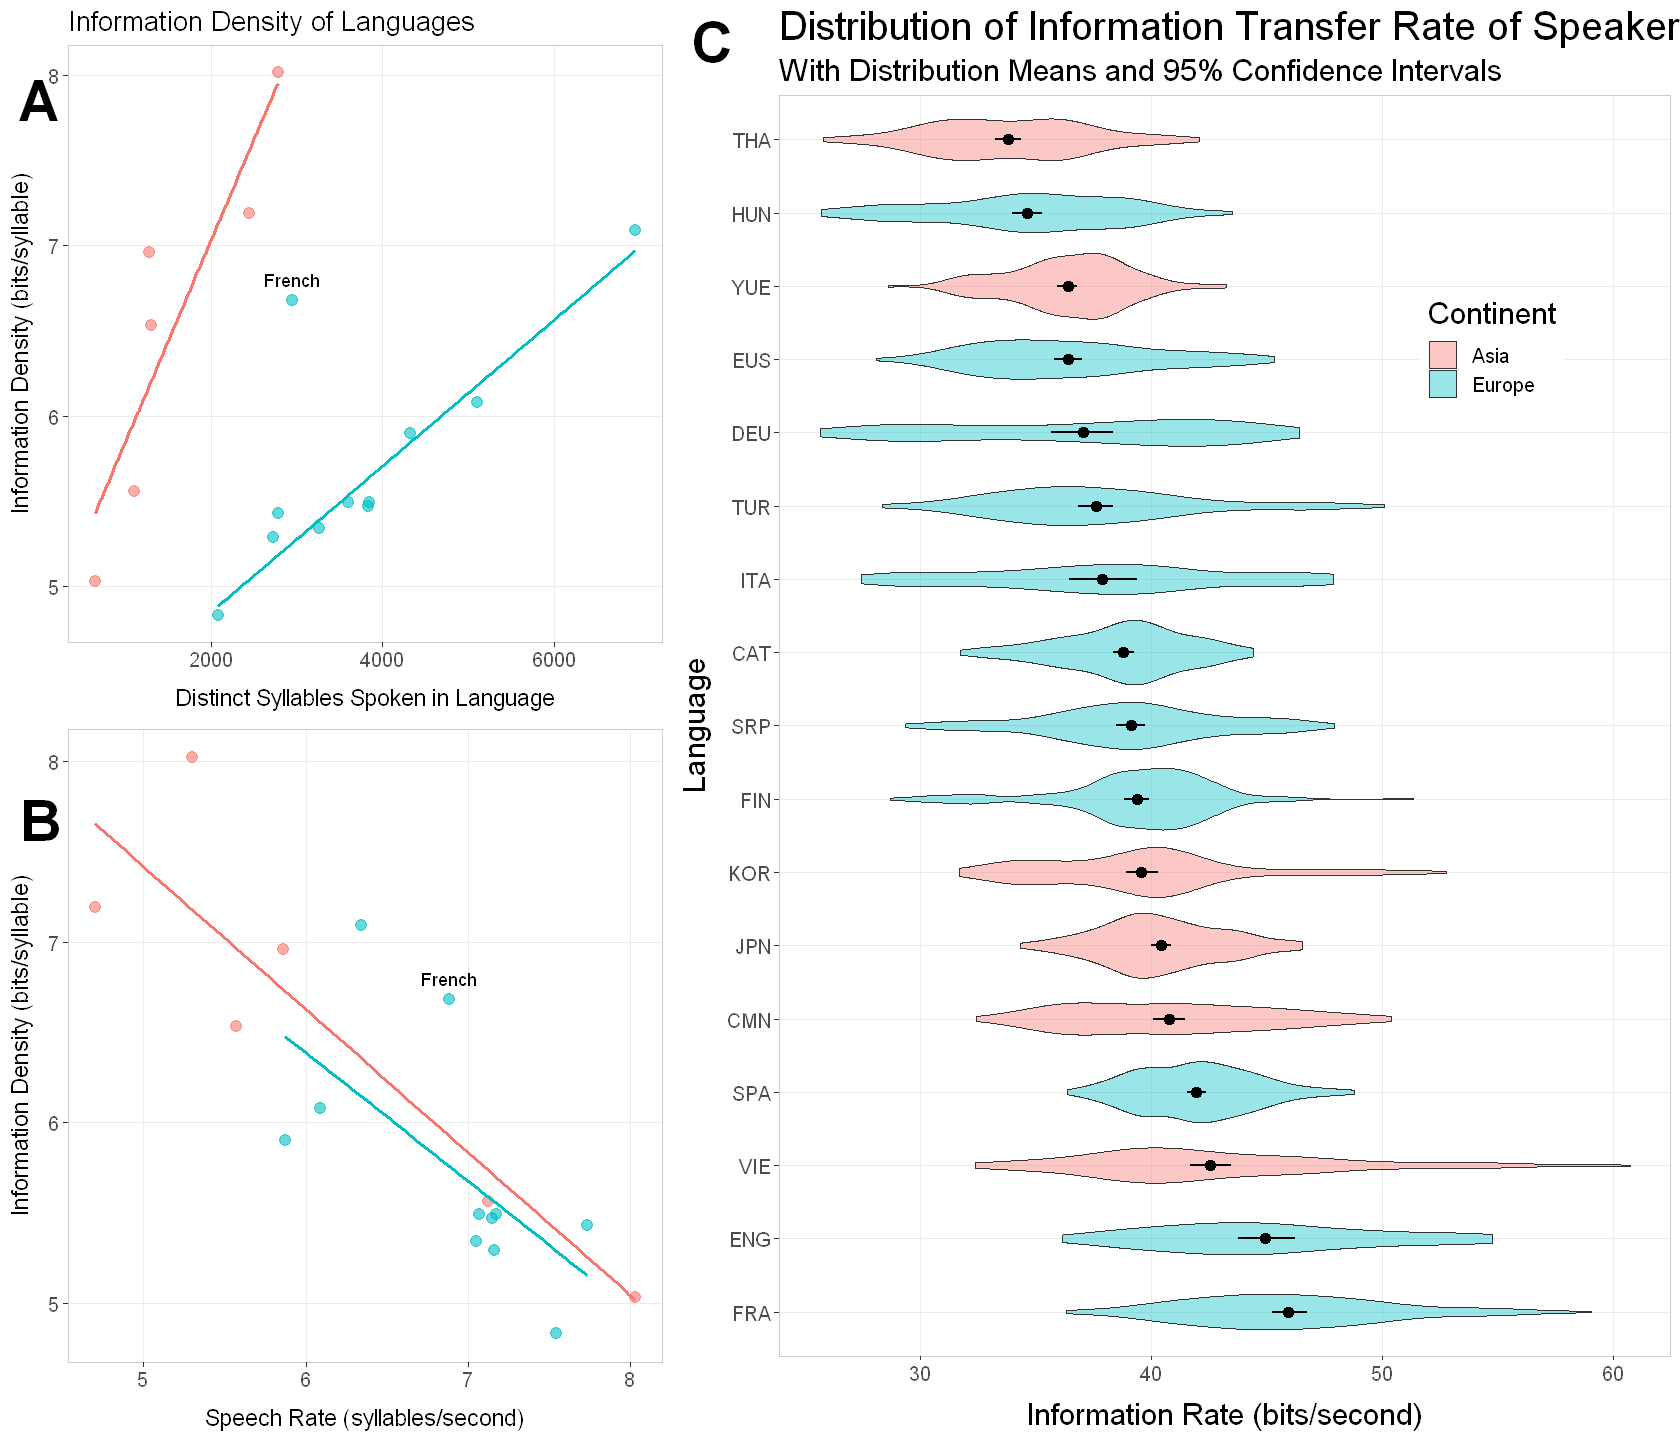

In [10]:
library(cowplot)
pcol <- plot_grid(
    q1_plot + theme(legend.position='none'),
    q2_plot + theme(legend.position='none', plot.title=element_blank()),
    rel_widths=c(1, 1), ncol=1, labels='AUTO', label_size=34, label_y = 0.92)

pdone <- plot_grid(
    pcol,
    q3_plot,
    rel_widths=c(2/3, 1), rel_heights=c(1, 1), ncol=2, labels=c('', 'C'), label_size=34)

# The command commented out below would save the file to my local computer.
# ggsave('final_grid.png', pdone)

pdone


---

Thank you, this has certainly been educational. I'll present these results to the intergalactic ministry of traffic and hopefully we can spare earth from the hyperspace bypass this time around... ah shoot, me and my big mouth! Basically there is nothing to worry about, you just keep squabbling amongst each other over lines in the sand and hopefully you wont hear from us again. So long and thanks for all the fish! 🛸🐬

---

# 6. Presenting figures to a general or a technical audience 

<p>Below you can see the original figure from <a href="https://advances.sciencemag.org/content/5/9/eaaw2594">the scientific article in “Science Advances”</a> and the <a href="https://www.economist.com/graphic-detail/2019/09/28/why-are-some-languages-spoken-faster-than-others">simplified version that was published in the Economist</a> (you can create a free account to read the article, no need to pay or use the trial). There is also <a href=https://advances.sciencemag.org/highwire/filestream/218792/field_highwire_adjunct_files/1/aaw2594_Analysis_script_file_S1.zip> an R Markdown file for how they did their analysis</a> in case you're interested.</p>

<div class="alert alert-warning" style="color:black">

### Question 6 (Optional)
rubric={reasoning:1.5}

<ol type="1">
<li>Briefly describe how the Economist have simplified the figure from the original scientific publication.</li>
<li>Do you agree with choices made by the Economist? Is there anything you think could have been done differently or additionally, that would have communicated the findings more clearly to a general / popular science audience? This could be based on design choices or your understanding of the data.</li>
</ol>

</div>

## Scientific figure

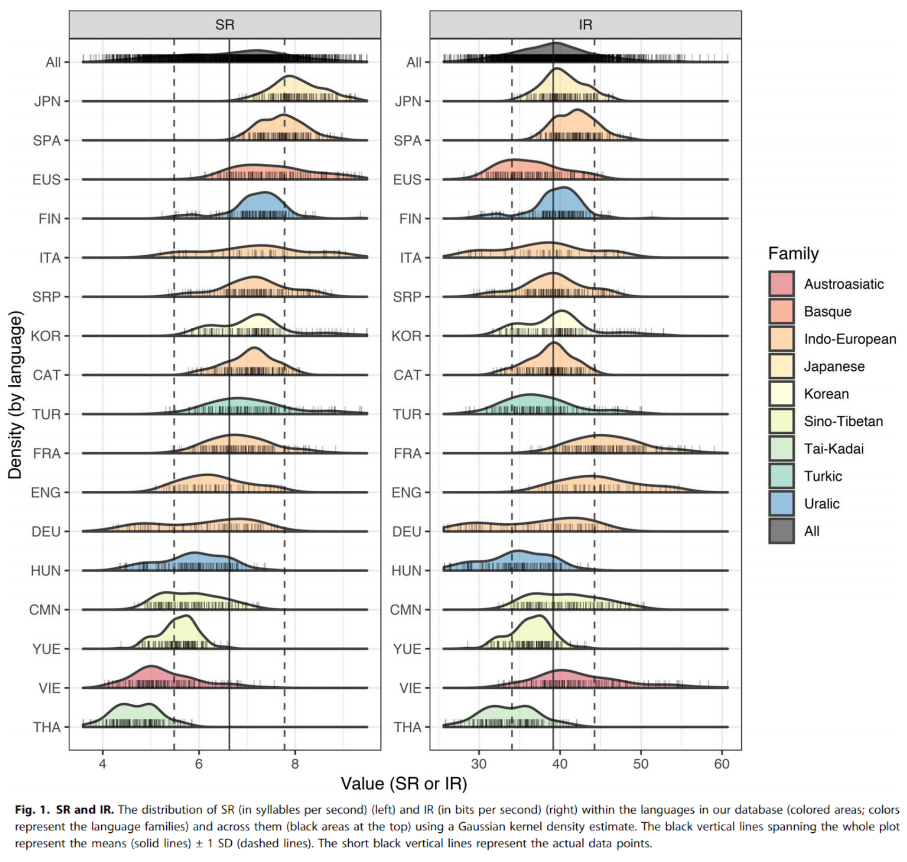

## Popular science figure

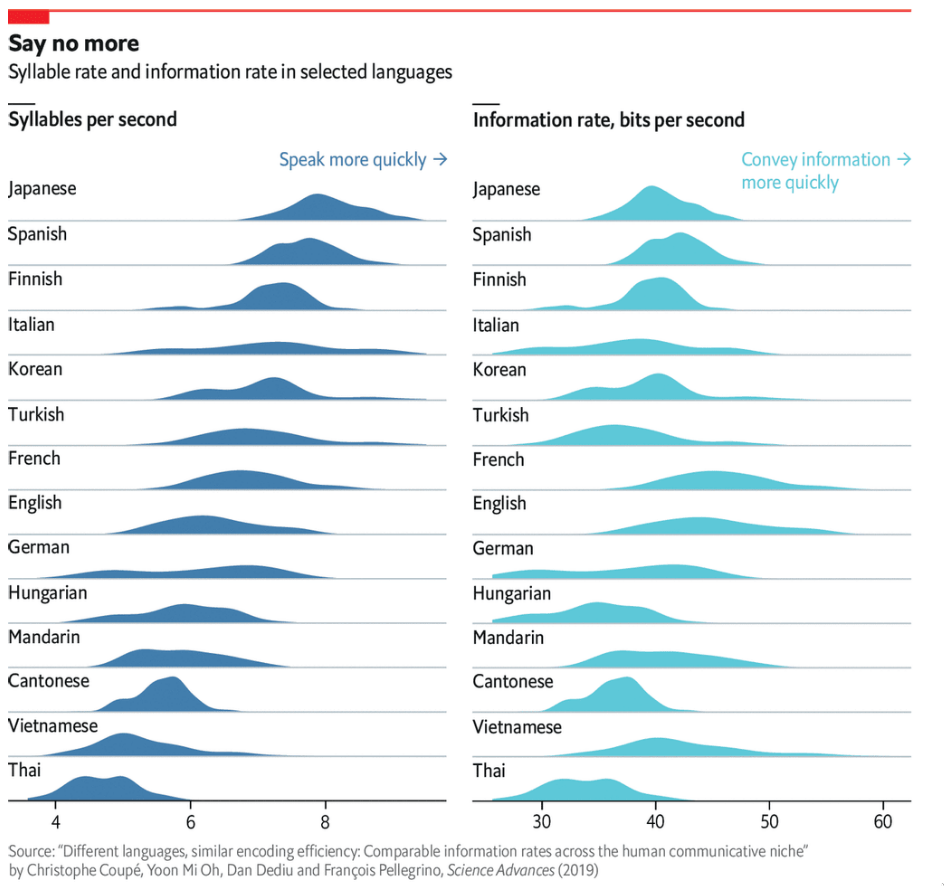

YOUR ANSWER GOES HERE

#### 1)

They removed the `family` of languages color encoding. They removed the mean and +/- 1 standard deviation lines from the plot. They removed the individual tick marks for each individual observation. They removed the figure description and added that information to the chart titles. They added a statement explaining what happens in each plot as we move to the right. They separated the plots by color. They removed the `All` distribution and used full language titles rather than the ISO language codes. 

#### 2)

I agree with most of the choices made by the economist. The general public may not be overly interested in fine details like the `family` of each language, so I agree with removing that color scheme. The general public also is less likely to know the ISO language codes, so it is helpful that they used the full language names. I also find it nicer when I can understand the chart and units by looking at the titles rather than having to read a tiny figure description below the chart. The general public mostly wants to know the overall trends of each language, so I agree with the choice of removing the individual tick marks. I do not agree with the decision to remove the mean line. I find the mean line makes it easier to compare between languages that are not right next to each other in the plot. 

I think one thing that could have been done differently would be to include a dot showing the average information rate for each individual language. I think the public may have a hard time comparing distributions that are spread out versus ones that are compact, so a mean dot would make it even easier to compare languages. 

# 7. Tell your story

<p>Only do this exercise if you feel like you have time over after completing all labs and want additional feedback on your story telling. It will likely take some time and does not give that many points.</p>

<div class="alert alert-warning" style="color:black">

### Question 7 (Optional)
rubric={reasoning:1}
 
<p>Use the same data to tell another story than the one we told here. Suggestively, you would do some EDA and then use around 2-3 figures with accompanying text to tell a short story about an interesting relationship that you found. I encourage you to try to think of an idea of your own, but if you can't come up with one, I have listed a few ideas below.</p>
    
<details><summary>Suggested ideas to explore</summary>
<ul>
<li>Does the particular text matter for which continent or language was faster? (you could do a paired comparison here)</li>
<li>Group by each speaker’s mean instead of showing all texts (I would personally prefer this to what we did above as I think it shows the variation and sample size more truly, although the means will be similar)</li>
<li>Add language families from the paper and see if there are any patterns among them.</li>
<li>Add additional language features such as tonality and see if there any patterns there.</li>
<li>Plot the different language features on a map.</li>
</ul>
</details>

</div>

In [11]:
# YOUR ANSWER GOES HERE

YOUR ANSWER GOES HERE

---

A couple of interesting videos on communication and language if you have some spare time this weekend:

- Switching from auditory transfer to electric via implants such as [Kevin Warvick's cyborg-like connection of his nervous system to the internet and his wife's jewelry](https://www.youtube.com/watch?v=Z8HeFNJjuj0&feature=youtu.be&t=822).
- There is evidence that the words we have at our disposal influences how we think. This could mean that certain thought patterns and emotions might be more accessible in languages where they are more easily verbalized, and maybe we would have slightly different thoughts if we knew another language (the reference here is the weak form of the Sapiro-Whorf hypothesis of linguistic relativity, not the strong version). After you are done with the lab, I recommend listening to [this talk by Lera Boroditsky](https://www.youtube.com/watch?v=RKK7wGAYP6k) or watching the movie "Arrival" (although they go a bit far...) if you are interested in learning more about this (it's fun to think about!).

---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Commit and push all your work (including the .ipynb file) to GitHub.
3. Submit a link to your repo on Canvas (this has to be done only once per group).

---

# Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans: 6 hours

2. Were there any questions that you particularly liked or disliked?

#Ans: [Questions you liked]

#Ans: [Questions you disliked]